In [9]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage, HumanMessage
from dotenv import load_dotenv
import time

# store data in RAM
from langgraph.checkpoint.memory import MemorySaver


# Joke and its explanation

In [10]:
load_dotenv()
model = ChatOpenAI(model="gpt-4o")

In [11]:
class JokeState(TypedDict):
    
    topic : str
    joke : str
    explanation : str

In [12]:
def generate_joke(state : JokeState):
    
    topic = state["topic"]
    prompt = f"generate a joke on {topic}"
    
    result = model.invoke(prompt)
    
    return {"joke" : result.content}
    

In [13]:
def generate_explanation(state : JokeState):
    
    joke = state["joke"]
    prompt = f"generate an explanation on the give {joke}"
    
    result = model.invoke(prompt)
    time.sleep(30)
    
    return {"explanation" : result.content}
    

In [14]:
checkpointer = MemorySaver()

graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

workflow = graph.compile(checkpointer=checkpointer)

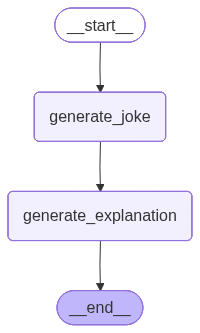

In [15]:
workflow

In [16]:
config = {"configurable" : {"thread_id" : "1"}}
result = workflow.invoke(
    {
        "topic" : "pizza"
    },
    config=config
)

result


{'topic': 'pizza',
 'joke': 'Why did the pizza break up with the topping?\n\nIt just couldn\'t handle the "cheesy" relationship anymore! 🍕😂',
 'explanation': 'This joke is a classic example of wordplay and humor involving puns. The setup involves a fictional storyline where a pizza "breaks up" with its topping, much like how people can end romantic relationships. The punchline revolves around the use of the word "cheesy." \n\nIn this context, "cheesy" has a double meaning. On one hand, it refers to the literal cheese that is often a key ingredient on pizza. On the other hand, "cheesy" is also a colloquial term used to describe something that is overly sentimental or clichéd in a humorous or slightly embarrassing way—often used to describe a romantic gesture or relationship that is exaggeratedly affectionate. \n\nTherefore, the pizza "couldn\'t handle the \'cheesy\' relationship anymore" implies that it was overwhelmed both by the abundant cheese and by how clichéd and overly sentimenta

In [17]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza break up with the topping?\n\nIt just couldn\'t handle the "cheesy" relationship anymore! 🍕😂', 'explanation': 'This joke is a classic example of wordplay and humor involving puns. The setup involves a fictional storyline where a pizza "breaks up" with its topping, much like how people can end romantic relationships. The punchline revolves around the use of the word "cheesy." \n\nIn this context, "cheesy" has a double meaning. On one hand, it refers to the literal cheese that is often a key ingredient on pizza. On the other hand, "cheesy" is also a colloquial term used to describe something that is overly sentimental or clichéd in a humorous or slightly embarrassing way—often used to describe a romantic gesture or relationship that is exaggeratedly affectionate. \n\nTherefore, the pizza "couldn\'t handle the \'cheesy\' relationship anymore" implies that it was overwhelmed both by the abundant cheese and by how clichéd an

In [18]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza break up with the topping?\n\nIt just couldn\'t handle the "cheesy" relationship anymore! 🍕😂', 'explanation': 'This joke is a classic example of wordplay and humor involving puns. The setup involves a fictional storyline where a pizza "breaks up" with its topping, much like how people can end romantic relationships. The punchline revolves around the use of the word "cheesy." \n\nIn this context, "cheesy" has a double meaning. On one hand, it refers to the literal cheese that is often a key ingredient on pizza. On the other hand, "cheesy" is also a colloquial term used to describe something that is overly sentimental or clichéd in a humorous or slightly embarrassing way—often used to describe a romantic gesture or relationship that is exaggeratedly affectionate. \n\nTherefore, the pizza "couldn\'t handle the \'cheesy\' relationship anymore" implies that it was overwhelmed both by the abundant cheese and by how clichéd a

In [19]:
config2 = {"configurable" : {"thread_id" : "2"}}
result = workflow.invoke(
    {
        "topic" : "pasta"
    },
    config=config2
)

result


{'topic': 'pasta',
 'joke': "Why did the spaghetti break up with the penne?\n\nIt just couldn't handle the serious committal of their relationship!",
 'explanation': 'The joke about the spaghetti breaking up with the penne is a playful use of wordplay and personification involving types of pasta. In this humorous scenario, spaghetti and penne are imagined as individuals in a romantic relationship. The punchline hinges on "serious committal," which can be interpreted as a pun on both commitment in a relationship and the behavior of cooked pasta.\n\nSpaghetti is known for its long, slender, and flexible nature, representing someone who might not be ready for a serious commitment. Penne, on the other hand, is a ridged, tubular pasta that holds sauce well—metaphorically implying stability or being well-suited for a "serious" or "committed" relationship. So, the spaghetti "breaking up" with the penne because it couldn\'t handle the "serious committal" is a light-hearted jab at spaghetti\'s 

In [20]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the spaghetti break up with the penne?\n\nIt just couldn't handle the serious committal of their relationship!", 'explanation': 'The joke about the spaghetti breaking up with the penne is a playful use of wordplay and personification involving types of pasta. In this humorous scenario, spaghetti and penne are imagined as individuals in a romantic relationship. The punchline hinges on "serious committal," which can be interpreted as a pun on both commitment in a relationship and the behavior of cooked pasta.\n\nSpaghetti is known for its long, slender, and flexible nature, representing someone who might not be ready for a serious commitment. Penne, on the other hand, is a ridged, tubular pasta that holds sauce well—metaphorically implying stability or being well-suited for a "serious" or "committed" relationship. So, the spaghetti "breaking up" with the penne because it couldn\'t handle the "serious committal" is a light-hearted j

In [21]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the spaghetti break up with the penne?\n\nIt just couldn't handle the serious committal of their relationship!", 'explanation': 'The joke about the spaghetti breaking up with the penne is a playful use of wordplay and personification involving types of pasta. In this humorous scenario, spaghetti and penne are imagined as individuals in a romantic relationship. The punchline hinges on "serious committal," which can be interpreted as a pun on both commitment in a relationship and the behavior of cooked pasta.\n\nSpaghetti is known for its long, slender, and flexible nature, representing someone who might not be ready for a serious commitment. Penne, on the other hand, is a ridged, tubular pasta that holds sauce well—metaphorically implying stability or being well-suited for a "serious" or "committed" relationship. So, the spaghetti "breaking up" with the penne because it couldn\'t handle the "serious committal" is a light-hearted 

Fault Tolerance

In [22]:
config3 = {"configurable" : {"thread_id" : "3"}}
result = workflow.invoke(
    {
        "topic" : "ball"
    },
    config=config3
)

result


KeyboardInterrupt: 

In [23]:
list(workflow.get_state_history(config3))

[StateSnapshot(values={'topic': 'ball', 'joke': 'Why did the soccer ball quit the team?\n\nIt was tired of getting kicked around!'}, next=('generate_explanation',), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f097efb-d2db-66aa-8001-184be20dc951'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-09-22T20:07:17.535300+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f097efb-c275-62c4-8000-4623e81cf8f4'}}, tasks=(PregelTask(id='012fb0b2-eccd-b0c1-d1fb-e73088af3982', name='generate_explanation', path=('__pregel_pull', 'generate_explanation'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'ball'}, next=('generate_joke',), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f097efb-c275-62c4-8000-4623e81cf8f4'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-22T20:0

In [24]:
result = workflow.invoke(
    None,
    config=config3
)

result


{'topic': 'ball',
 'joke': 'Why did the soccer ball quit the team?\n\nIt was tired of getting kicked around!',
 'explanation': 'The question "Why did the soccer ball quit the team?" sets up a play on words centered around the personification of a soccer ball. The punchline, "It was tired of getting kicked around!", cleverly anthropomorphizes the soccer ball, attributing to it human emotions and actions such as quitting and feeling tired.\n\nIn reality, a soccer ball is, of course, an inanimate object that cannot literally quit a team or experience emotions. However, the joke imagines the soccer ball as if it were capable of feeling frustration or fatigue from its constant role in the game, where it is repeatedly kicked by players. This humorous twist leverages the dual meaning of "getting kicked around"—both the literal kicking of the soccer ball as part of the sport and the idiomatic expression meaning to be treated poorly or with little respect. \n\nThe humor comes from the absurdity

In [25]:
# there up is not error but a keyboard intrupt ... and then we pass None to resume it from where it stopped 
list(workflow.get_state_history(config3))

[StateSnapshot(values={'topic': 'ball', 'joke': 'Why did the soccer ball quit the team?\n\nIt was tired of getting kicked around!', 'explanation': 'The question "Why did the soccer ball quit the team?" sets up a play on words centered around the personification of a soccer ball. The punchline, "It was tired of getting kicked around!", cleverly anthropomorphizes the soccer ball, attributing to it human emotions and actions such as quitting and feeling tired.\n\nIn reality, a soccer ball is, of course, an inanimate object that cannot literally quit a team or experience emotions. However, the joke imagines the soccer ball as if it were capable of feeling frustration or fatigue from its constant role in the game, where it is repeatedly kicked by players. This humorous twist leverages the dual meaning of "getting kicked around"—both the literal kicking of the soccer ball as part of the sport and the idiomatic expression meaning to be treated poorly or with little respect. \n\nThe humor come

Time Travel

every time when run code .. make sure to change checkpoint ids .. new generated 

In [34]:
# pasta(thread -> 2) going on state where topic was generated .. with help of thread and checkpoint id ..
config_topic_state = {
        "configurable" :
            {
                "thread_id" : "2",
                "checkpoint_id" : "1f097ef9-e6ff-643c-8000-8c0ed013f21e",
                "checkpoint_ns" : ""
            }
    }

workflow.get_state(config=config_topic_state)

StateSnapshot(values={'topic': 'pasta'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f097ef9-e6ff-643c-8000-8c0ed013f21e', 'checkpoint_ns': ''}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-22T20:06:25.960044+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097ef9-e6fd-6705-bfff-595f736a9277'}}, tasks=(PregelTask(id='ad8b3ffa-bbf9-19a5-5740-74d3c882e009', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Why did the spaghetti break up with the penne?\n\nIt just couldn't handle the serious committal of their relationship!"}),), interrupts=())

In [29]:
# now i get time travel back and i can run from there again .. like i moved back to topic state and now when i run new joke and explanation implemented ..
workflow.invoke(
    None,
    config_topic_state
)

{'topic': 'pasta',
 'joke': "Why don't pasta chefs ever get locked out of their houses?\n\nBecause they always have plenty of gnocchi!",
 'explanation': 'This joke is a classic example of a pun, a form of wordplay that exploits the multiple meanings of a word or a phrase for humorous effect. In this case, the humor derives from the play on the word "gnocchi." \n\n"Gnocchi" is a type of Italian pasta made from potatoes, flour, and sometimes eggs. However, when pronounced, "gnocchi" sounds very similar to "no key." The joke hinges on this phonetic similarity. The setup of the joke – asking why pasta chefs never get locked out of their houses – leads the audience to think about solutions for being locked out, such as having a key. The punchline humorously suggests that pasta chefs have "plenty of gnocchi" (or "no key"), implying that because they always have "no key," they cannot possibly be locked out. \n\nThe clever twist is in making the audience persistently think in terms of pasta in

In [30]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why don't pasta chefs ever get locked out of their houses?\n\nBecause they always have plenty of gnocchi!", 'explanation': 'This joke is a classic example of a pun, a form of wordplay that exploits the multiple meanings of a word or a phrase for humorous effect. In this case, the humor derives from the play on the word "gnocchi." \n\n"Gnocchi" is a type of Italian pasta made from potatoes, flour, and sometimes eggs. However, when pronounced, "gnocchi" sounds very similar to "no key." The joke hinges on this phonetic similarity. The setup of the joke – asking why pasta chefs never get locked out of their houses – leads the audience to think about solutions for being locked out, such as having a key. The punchline humorously suggests that pasta chefs have "plenty of gnocchi" (or "no key"), implying that because they always have "no key," they cannot possibly be locked out. \n\nThe clever twist is in making the audience persistently think 

Updating State

In [31]:
workflow.get_state(config=config_topic_state)

StateSnapshot(values={'topic': 'pasta'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f097ef9-e6ff-643c-8000-8c0ed013f21e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-22T20:06:25.960044+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097ef9-e6fd-6705-bfff-595f736a9277'}}, tasks=(PregelTask(id='ad8b3ffa-bbf9-19a5-5740-74d3c882e009', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Why did the spaghetti break up with the penne?\n\nIt just couldn't handle the serious committal of their relationship!"}),), interrupts=())

In [32]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why don't pasta chefs ever get locked out of their houses?\n\nBecause they always have plenty of gnocchi!", 'explanation': 'This joke is a classic example of a pun, a form of wordplay that exploits the multiple meanings of a word or a phrase for humorous effect. In this case, the humor derives from the play on the word "gnocchi." \n\n"Gnocchi" is a type of Italian pasta made from potatoes, flour, and sometimes eggs. However, when pronounced, "gnocchi" sounds very similar to "no key." The joke hinges on this phonetic similarity. The setup of the joke – asking why pasta chefs never get locked out of their houses – leads the audience to think about solutions for being locked out, such as having a key. The punchline humorously suggests that pasta chefs have "plenty of gnocchi" (or "no key"), implying that because they always have "no key," they cannot possibly be locked out. \n\nThe clever twist is in making the audience persistently think 

In [36]:
workflow.update_state(config_topic_state, {"topic" : "bat"})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f097f0b-abaf-6fa5-8001-7ea5c5484aca'}}

In [37]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'bat'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097f0b-abaf-6fa5-8001-7ea5c5484aca'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-09-22T20:14:22.924790+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097ef9-e6ff-643c-8000-8c0ed013f21e'}}, tasks=(PregelTask(id='a1ae9fdf-5499-d207-c937-c215dc7b0d74', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': "Why don't pasta secrets ever get out?\n\nBecause the noodle's lips are always sealed! 🍝", 'explanation': 'This playful explanation relies on a pun involving the characteristics of pasta and a humorous take on the idea of secrets. When someone mentions that a person’s "lips are sealed," they mean that person will keep a secret and n

In [38]:
config_topic_state_update = {
        "configurable" :
            {
                "thread_id" : "2",
                "checkpoint_id" : "1f097f0b-abaf-6fa5-8001-7ea5c5484aca",
                "checkpoint_ns" : ""
            }
    }

workflow.invoke(None, config_topic_state_update)

{'topic': 'bat',
 'joke': "Why don't bats use smartphones?\n\nBecause they're afraid of apps!",
 'explanation': 'This explanation plays on the dual meaning of the word "apps," which can stand for "applications" on smartphones or be humorously interpreted as "bites" in the context of bats, which are known for their association with biting (though in reality, most species of bats are not aggressive towards humans). The joke suggests that bats avoid using smartphones because they\'re humorously "afraid" of these "apps," implying they might be fearful of the digital world or the confusion it offers compared to their natural instincts and environment. This anthropomorphizes bats, attributing them with human-like fears for comedic effect.'}

In [ ]:
# the id above is the id of checkpoint where pasta was changes to bat ...
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'bat', 'joke': "Why don't bats use smartphones?\n\nBecause they're afraid of apps!", 'explanation': 'This explanation plays on the dual meaning of the word "apps," which can stand for "applications" on smartphones or be humorously interpreted as "bites" in the context of bats, which are known for their association with biting (though in reality, most species of bats are not aggressive towards humans). The joke suggests that bats avoid using smartphones because they\'re humorously "afraid" of these "apps," implying they might be fearful of the digital world or the confusion it offers compared to their natural instincts and environment. This anthropomorphizes bats, attributing them with human-like fears for comedic effect.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097f0e-5036-6a02-8003-21f2809a8545'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-09-22T20:15:33.863680+00:00', 

Human in the loop .. cover in next parts ..